<a href="https://colab.research.google.com/github/DanileRond/ARAP/blob/main/Copia_de_Multi_Armed_Bandit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MULTI-ARMED BANDIT

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
np.random.seed(4)

### Plot functions

In [3]:
'''Insert title, and axis labels to plots'''
def insert_labels(labels, ax):
    if 'title' in labels:
        ax.set_title(labels['title']) 
    if 'xlabel' in labels:
        ax.set_xlabel(labels['xlabel']) 
    if 'ylabel' in labels:
	    ax.set_ylabel(labels['ylabel'])

def generate_plot(r, ba, q, strg, par):
    str_legend = ['{}, {}={}'.format('UCB' if strg else 'e-greedy', 'c' if strg else 'delta', p) for p in par]

    conf_1 = {'title': 'Average reward', 'xlabel': 'steps', 'ylabel': 'avg reward'}
    conf_2 = {'title': 'Percentage optimal actions', 'xlabel': 'steps', 'ylabel': '% optimal actions'}
    conf_3 = {'title': str_legend[-1], 'xlabel': 'steps', 'ylabel': 'Q(a)'}

    fig, ax = plt.subplots(1,3, figsize=(18, 7))
    for i, (data, conf) in enumerate(zip([r, ba, q],[conf_1, conf_2, conf_3])):
        for j, d in enumerate(data):
            ax[i].plot(d)
            insert_labels(conf, ax[i])
        if i < 2:
            ax[i].legend(str_legend)
    
    ax[0].plot(np.ones(len(d))*np.max(meanA)) # Include the optimum reward in the display

### Multi-armed bandit setting

In [4]:
m = 10                                   # number of actions
dispMeansA = 1.5                        # dispersion in the values of means for every action
dispStd = 0.05                           # dispersion in the values of variances for every action
meanA = np.random.randn(m)*dispMeansA   # means for every action
bestAction = np.argmax(meanA)           # index of the best action
stdA = np.random.rand(m)*dispStd        # std deviations for every action
alpha = 0.01                            # time constant for incremental estimation of Q in time-varying environment

### Simulation setting

In [9]:
NRuns = 200                             # number of independent runs to be averaged
NSteps = 500                            # number of time steps per run

r = np.zeros((NRuns, NSteps))           # instantaneous rewards
Q = np.zeros((m, NSteps))               # average reward per action
BA = np.zeros((NRuns, NSteps))          # best action collection

Strat = 1                               # 0: e-greedy, 1: UCB

### Decision taking setting

In [11]:
if Strat:
    par = np.array([0.5, 1, 2])        # values of c UCB                       
else:
    par = np.array([0, 0.1, 1])        # values of delta e-greedy       

### Random trials for each parameter of the algorithm and for all independent runs

In [16]:
avg_r = []
avg_ba = []
for e in range(len(par)):                                       # parameters for the method
    BA = np.zeros((NRuns, NSteps))                              # identifies if best action has been selected
    for i in range(NRuns):
        Q = np.zeros((m, NSteps))                               # average reward per action
        Q[:,0] = np.random.randn(m)*0.1   
        U = np.zeros((m,NSteps))                                # initialization of Q
        U[:,0] = np.random.randn(m)*100
        ta = np.zeros((m))                                      # times each action is selected
        for j in range(1, NSteps):
            # e-greedy
            if not Strat:
                I = np.argmax(Q[:,j-1])                         # select best action
                if np.random.rand() > min(1, m*par[e]/j):       # e-greedy with decaying epsilon
                    a = I
                else:
                    randIndex = np.random.randint(m-1)          # select an action other than greedy one
                    a = randIndex + (randIndex >= I)
                
                ta[a] += 1
                r[i,j] = meanA[a] + np.random.randn()*stdA[a]   # obtain the gaussian reward
                Q[:,j] = Q[:, j-1]                              # update Q function
                Q[a,j] += 1/ta[a] * (r[i,j] - Q[a, j])
            # UCB
            else:
                # COMPLETE THE CODE FOR UCB HERE
                I = np.argmax(Q[:,j-1] + U[:,j-1])
                
                ta[a] += 1
                r[i,j] = meanA[a] + np.random.randn()*stdA[a]
              
                Q[:,j] = Q[:, j-1] 
                Q[a,j] += 1/ta[a] * (r[i,j] - Q[a, j])
                U[:,j] = U[:, j-1]
              
          #    U[a,j] += par(e) * np.sqrt(2*np.log(j)/(ta[a]))
                U[a,j] = par[e] * np.sqrt((2*np.log(j))/(ta[a]))
                a = I
              
                

            BA[i,j] += bestAction == a
                
    avg_r.append(np.mean(r.copy(), axis=0))
    avg_ba.append(np.mean(BA.copy(), axis=0)*100)

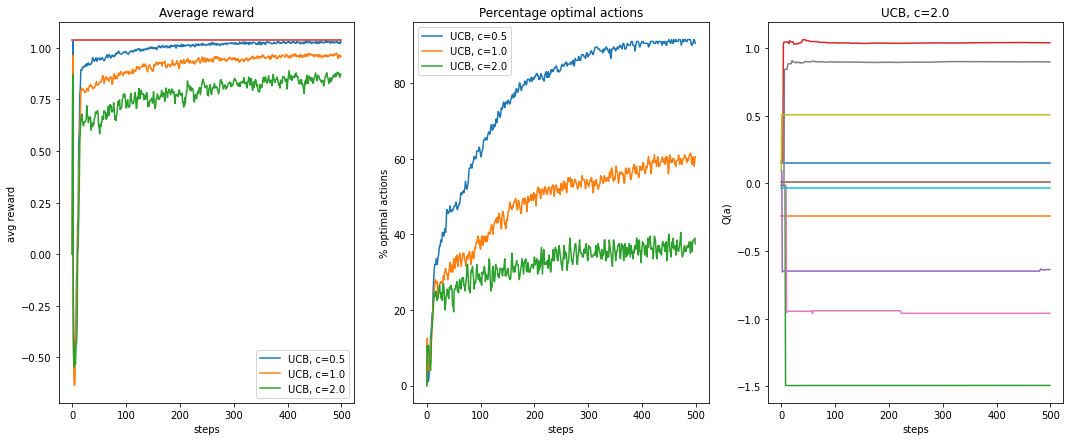

In [17]:
generate_plot(avg_r, avg_ba, Q, Strat, par)